# House prices predictions

## Feature analysis 

- Regressione classica
- Feature reduction (PCA, SVD)
- Clustering alle case (togliendo prezzo)
- cross validation or hold-out

In [232]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline

houses = pd.read_csv("../datasets/house_prices/train.csv")
houses = houses._get_numeric_data().dropna(axis=1)
houses = houses.drop(['Id'], axis=1)

sns.distplot(houses['SalePrice']);
houses['SalePrice'].describe()


#skewness and kurtosis
print("Skewness: %f" % houses['SalePrice'].skew())
print("Kurtosis: %f" % houses['SalePrice'].kurt())



In [ ]:
Analizzo mappa di calore:

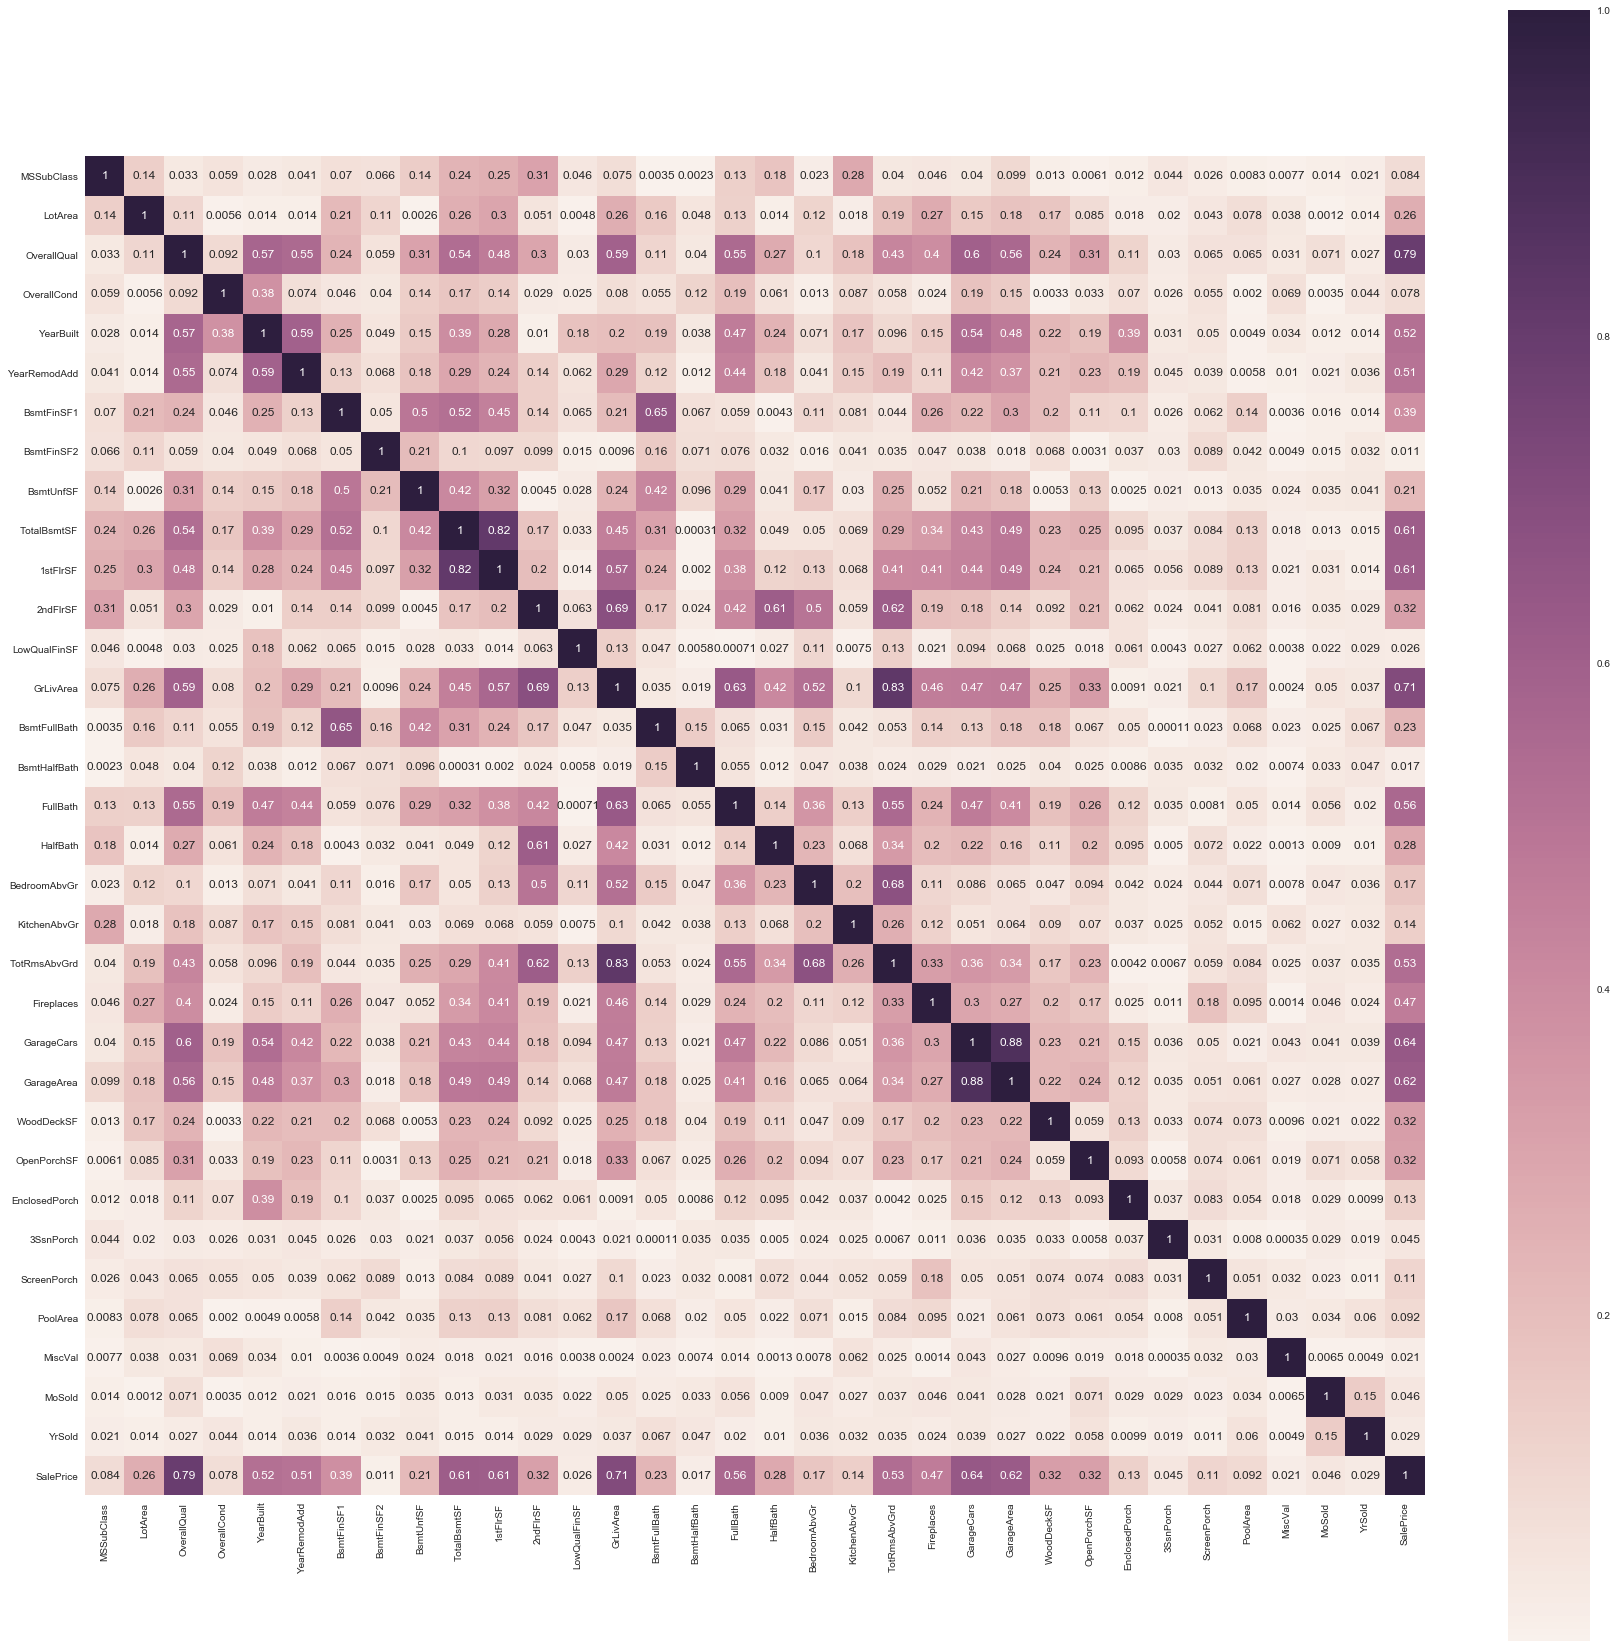

In [177]:
corrmat = houses.corr().abs()
f, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corrmat, annot=True, square=True);

Seleziono le features con correlazione >0.75:

In [266]:
soglia = 0.75
s = corrmat.unstack()
best_features = s[s<1].sort_values()[s>soglia]
l1, l2 = zip(*best_features.index.tolist())
name_best_features = list(set(l1).intersection(l2))
print("Le features con correlazione > "+str(soglia)+" sono: ",name_best_features)


Le features con correlazione > 0.75 sono:  ['GarageArea', 'SalePrice', 'OverallQual', 'TotRmsAbvGrd', '1stFlrSF', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']


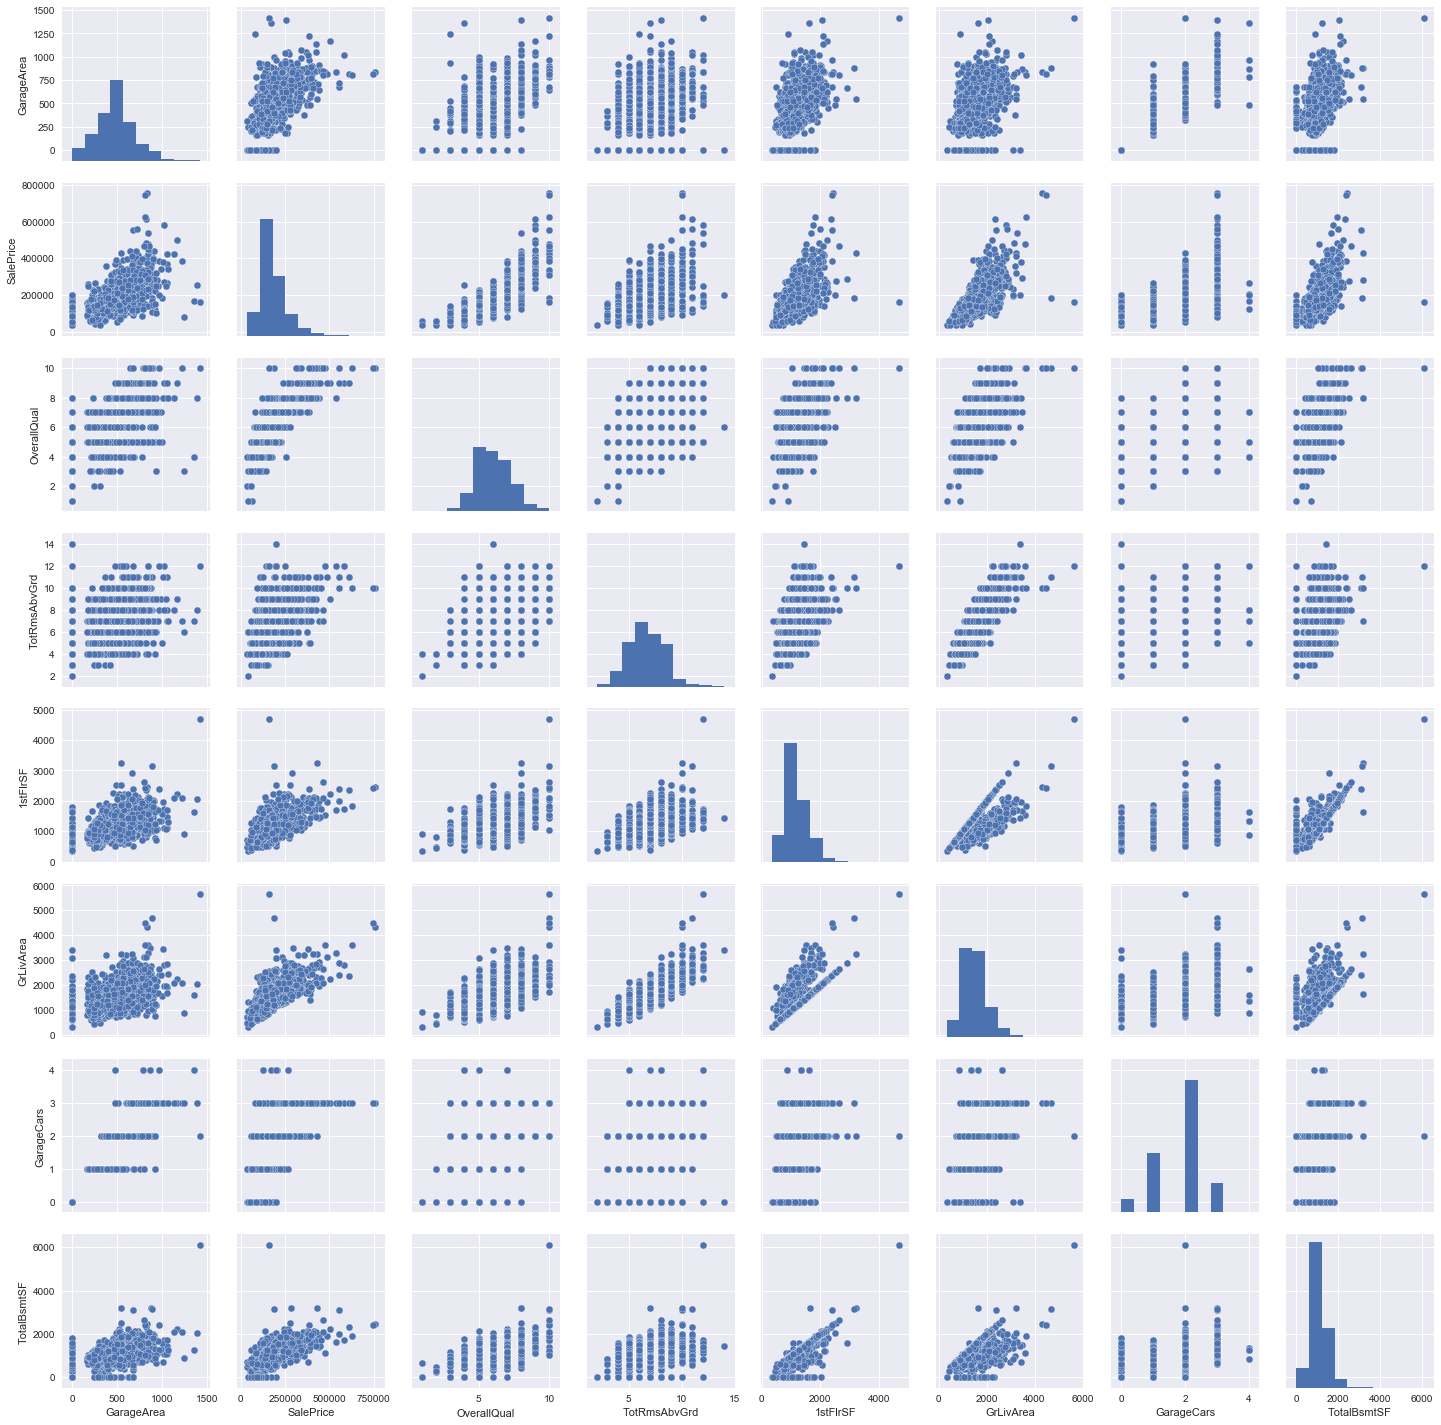

In [256]:
#scatterplot
sns.set()
sns.pairplot(houses[name_best_features], size = 2.5)
plt.show();

### Regressione lineare

In [287]:
# Split the data into training/testing sets
#houses_X_train = houses_X[:-20]
#houses_X_test = houses_X[-20:]

# Split the targets into training/testing sets
#houses_y_train = houses_y[:-20]
#houses_y_test = houses_y[-20:]

iter = 10
tot_score = 0.
tot_rmse = 0.
for i in range(iter):
    houses_train, houses_test = train_test_split(houses, test_size=1/3,)
    
    houses_X_train = houses_train.drop(['SalePrice'], axis=1)
    houses_y_train = houses_train['SalePrice']

    houses_X_test = houses_test.drop([ 'SalePrice'], axis=1)
    houses_y_test = houses_test['SalePrice']
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(houses_X_train, houses_y_train)

    # The coefficients
    #print('Coefficients: \n', regr.coef_, regr.intercept_)
    # The mean squared error
    rmse = np.sqrt(np.mean((regr.predict(houses_X_test) - houses_y_test) ** 2))
    print("Root mean squared error: %.2f"% rmse)
    # Explained variance score: 1 is perfect prediction
    score = regr.score(houses_X_test, houses_y_test)
    print('Variance score: %.2f' % score)
    tot_rmse += rmse
    tot_score += score
    
print('\nAverage score: %.2f' % float(tot_score/iter))
print('Average rmse: %.2f' % float(tot_rmse/iter))    

Root mean squared error: 37835.26
Variance score: 0.79
Root mean squared error: 37304.89
Variance score: 0.78
Root mean squared error: 36383.97
Variance score: 0.76
Root mean squared error: 38419.23
Variance score: 0.77
Root mean squared error: 43488.68
Variance score: 0.74
Root mean squared error: 43358.70
Variance score: 0.66
Root mean squared error: 48169.40
Variance score: 0.65
Root mean squared error: 48181.90
Variance score: 0.63
Root mean squared error: 42937.74
Variance score: 0.75
Root mean squared error: 36858.78
Variance score: 0.78

Average score: 0.73
Average rmse: 41293.86


### Alberi di decisione

In [286]:
from sklearn import tree

iter = 10
tot_score = 0.
tot_rmse = 0.
for i in range(iter):
    houses_train, houses_test = train_test_split(houses, test_size=1/3,)
    
    houses_X_train = houses_train.drop(['SalePrice'], axis=1)
    houses_y_train = houses_train['SalePrice']

    houses_X_test = houses_test.drop(['SalePrice'], axis=1)
    houses_y_test = houses_test['SalePrice']
    # Create linear regression object
    tree_model = tree.DecisionTreeRegressor()

    # Train the model using the training sets
    tree_model.fit(houses_X_train, houses_y_train)

    # The coefficients
    #print('Coefficients: \n', regr.coef_, regr.intercept_)
    # The mean squared error
    rmse = np.sqrt(np.mean((tree_model.predict(houses_X_test) - houses_y_test) ** 2))
    print("Root mean squared error: %.2f"% rmse)
    # Explained variance score: 1 is perfect prediction
    score = tree_model.score(houses_X_test, houses_y_test)
    print('Variance score: %.2f' % score)
    tot_rmse += rmse
    tot_score += score
    
print('\nAverage score: %.2f' % float(tot_score/iter))
print('Average rmse: %.2f' % float(tot_rmse/iter))    

Root mean squared error: 42696.82
Variance score: 0.74
Root mean squared error: 36951.90
Variance score: 0.77
Root mean squared error: 38339.60
Variance score: 0.80
Root mean squared error: 39084.20
Variance score: 0.74
Root mean squared error: 40491.00
Variance score: 0.75
Root mean squared error: 50667.61
Variance score: 0.60
Root mean squared error: 47506.91
Variance score: 0.68
Root mean squared error: 45340.27
Variance score: 0.71
Root mean squared error: 41156.54
Variance score: 0.72
Root mean squared error: 39269.87
Variance score: 0.74

Average score: 0.72
Average rmse: 42150.47
